In [1]:
import pandas as pd
#load data set
sentiment=pd.read_csv("/content/sentiment.csv")
trader=pd.read_csv("/content/trader_data.csv")

sentiment.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [2]:
trader.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


Document Basic Info

In [3]:
print("Sentiment shape:", sentiment.shape)
print("Trader shape:", trader.shape)

Sentiment shape: (2644, 4)
Trader shape: (211224, 16)


In [4]:
#Check Missing Values
print("Sentiment missing values:\n", sentiment.isnull().sum())
print("Trader missing values:\n", trader.isnull().sum())

Sentiment missing values:
 timestamp         0
value             0
classification    0
date              0
dtype: int64
Trader missing values:
 Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
dtype: int64


In [5]:
#Check Duplicates
print("Sentiment duplicates:", sentiment.duplicated().sum())
print("Trader duplicates:", trader.duplicated().sum())

Sentiment duplicates: 0
Trader duplicates: 0


The dataset contained no missing values in key variables such as Closed PnL, Size USD, and Date, ensuring reliable metric computation.

Convert Dates Properly

In [6]:
sentiment["date"] = pd.to_datetime(sentiment["date"])

In [7]:
trader["Timestamp IST"] = pd.to_datetime(trader["Timestamp IST"], format='%d-%m-%Y %H:%M')
trader["Date"] = trader["Timestamp IST"].dt.date

In [8]:
sentiment["date"] = sentiment["date"].dt.date


Merge Both Datasets

In [9]:
merged = pd.merge(trader, sentiment, left_on="Date", right_on="date", how="inner")
merged.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,...,Order ID,Crossed,Fee,Trade ID,Timestamp,Date,timestamp,value,classification,date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02,1733117400,80,Extreme Greed,2024-12-02
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02,1733117400,80,Extreme Greed,2024-12-02
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02,1733117400,80,Extreme Greed,2024-12-02
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02,1733117400,80,Extreme Greed,2024-12-02
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02,1733117400,80,Extreme Greed,2024-12-02


The merge was performed on the Date column to attach sentiment classification (Fear/Greed) to each trading activity, enabling sentiment-based behavioral analysis.

Create Key Metrics

Daily PnL per trader
Closed PnL was used as the primary performance metric, as it reflects realized profitability from completed trades. This avoids distortions from unrealized gains or open positions.

In [10]:
daily_pnl = merged.groupby(["Account", "date"])["Closed PnL"].sum().reset_index()
daily_pnl

,Account,date,Closed PnL
0,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-11,0.000000
1,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-17,0.000000
2,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-18,0.000000
3,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-22,-21227.000000
4,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-26,1603.100000
...,...,...,...
2335,0xbee1707d6b44d4d52bfe19e41f8a828645437aab,2025-04-27,1709.194807
2336,0xbee1707d6b44d4d52bfe19e41f8a828645437aab,2025-04-28,4008.588908
2337,0xbee1707d6b44d4d52bfe19e41f8a828645437aab,2025-04-29,8561.771838
2338,0xbee1707d6b44d4d52bfe19e41f8a828645437aab,2025-04-30,2520.773814


Win Rate
Win rate = % of trades with positive PnL

In [11]:
merged["win"] = merged["Closed PnL"] > 0

win_rate = merged.groupby("Account")["win"].mean().reset_index()
win_rate

,Account,win
0,0x083384f897ee0f19899168e3b1bec365f52a9012,0.359612
1,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,0.442720
2,0x271b280974205ca63b716753467d5a371de622ab,0.301917
3,0x28736f43f1e871e6aa8b1148d38d4994275d72c4,0.438585
4,0x2c229d22b100a7beb69122eed721cee9b24011dd,0.519914
5,0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891,0.455215
6,0x39cef799f8b69da1995852eea189df24eb5cae3c,0.327668
7,0x3f9a0aadc7f04a7c9d75dc1b5a6ddd6e36486cf6,0.475904
8,0x420ab45e0bd8863569a5efbb9c05d91f40624641,0.234987
9,0x430f09841d65beb3f27765503d0f850b8bce7713,0.484236


Average Trade Size

In [12]:
avg_size = merged.groupby("Account")["Size USD"].mean().reset_index()
avg_size

,Account,Size USD
0,0x083384f897ee0f19899168e3b1bec365f52a9012,16159.576734
1,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,1653.226327
2,0x271b280974205ca63b716753467d5a371de622ab,8893.000898
3,0x28736f43f1e871e6aa8b1148d38d4994275d72c4,507.626933
4,0x2c229d22b100a7beb69122eed721cee9b24011dd,3138.894782
5,0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891,1729.941104
6,0x39cef799f8b69da1995852eea189df24eb5cae3c,4790.575486
7,0x3f9a0aadc7f04a7c9d75dc1b5a6ddd6e36486cf6,3445.471265
8,0x420ab45e0bd8863569a5efbb9c05d91f40624641,5189.367128
9,0x430f09841d65beb3f27765503d0f850b8bce7713,2397.824753


Number of Trades per Day

In [13]:
trades_per_day = merged.groupby("date").size().reset_index(name="trade_count")
trades_per_day

,date,trade_count
0,2023-05-01,3
1,2023-12-05,9
2,2023-12-14,11
3,2023-12-15,2
4,2023-12-16,3
...,...,...
474,2025-04-27,337
475,2025-04-28,1379
476,2025-04-29,2243
477,2025-04-30,1113


Long/Short Ratio

In [14]:
long_short = merged.groupby(["date", "Side"]).size().unstack()
long_short

Side,BUY,SELL
date,,
2023-05-01,3.0,NaN
2023-12-05,7.0,2.0
2023-12-14,5.0,6.0
2023-12-15,2.0,NaN
2023-12-16,3.0,NaN
...,...,...
2025-04-27,209.0,128.0
2025-04-28,652.0,727.0
2025-04-29,1105.0,1138.0


Why NaN?

Because SELL category does not exist for that date.

Not because it's missing.

In [15]:
long_short = merged.groupby(["date", "Side"]).size().unstack().fillna(0)
long_short

Side,BUY,SELL
date,,
2023-05-01,3.0,0.0
2023-12-05,7.0,2.0
2023-12-14,5.0,6.0
2023-12-15,2.0,0.0
2023-12-16,3.0,0.0
...,...,...
2025-04-27,209.0,128.0
2025-04-28,652.0,727.0
2025-04-29,1105.0,1138.0


The long/short ratio was computed to assess directional bias in trading behavior. Changes in this ratio across sentiment regimes may indicate shifts in market outlook and confidence.

In [16]:
print("Merged dataset shape:", merged.shape)
print("Sentiment distribution:\n", merged["classification"].value_counts())

Merged dataset shape: (211218, 22)
Sentiment distribution:
 classification
Fear             61837
Greed            50303
Extreme Greed    39992
Neutral          37686
Extreme Fear     21400
Name: count, dtype: int64


Part B — Analysis

Compare performance on Fear vs Greed

In [17]:
#Compare Average PnL
pnl_by_sentiment = merged.groupby("classification")["Closed PnL"].mean()
pnl_by_sentiment

,Closed PnL
classification,
Extreme Fear,34.537862
Extreme Greed,67.892861
Fear,54.290400
Greed,42.743559
Neutral,34.307718


In [18]:
daily_sentiment_pnl = merged.groupby(["Date", "classification"])["Closed PnL"].sum().reset_index()

avg_daily_pnl = daily_sentiment_pnl.groupby("classification")["Closed PnL"].mean()
avg_daily_pnl

,Closed PnL
classification,
Extreme Fear,52793.589178
Extreme Greed,23817.292199
Fear,36891.818040
Greed,11140.566181
Neutral,19297.323516


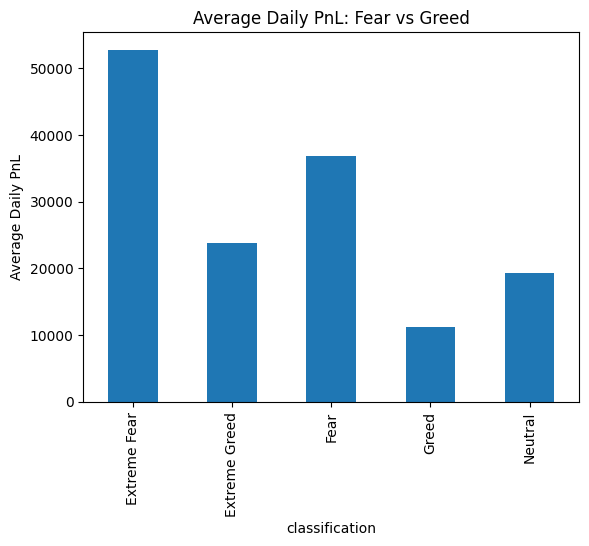

In [31]:
import matplotlib.pyplot as plt

daily_pnl = merged.groupby(["Date", "classification"])["Closed PnL"].sum().reset_index()

avg_daily_pnl = daily_pnl.groupby("classification")["Closed PnL"].mean()

avg_daily_pnl.plot(kind="bar")
plt.title("Average Daily PnL: Fear vs Greed")
plt.ylabel("Average Daily PnL")
plt.show()

1 Traders earn the highest average daily PnL during Extreme Fear, followed by Fear.

2 Profit is much lower during Greed and Extreme Greed.

3 Neutral sentiment shows moderate performance.

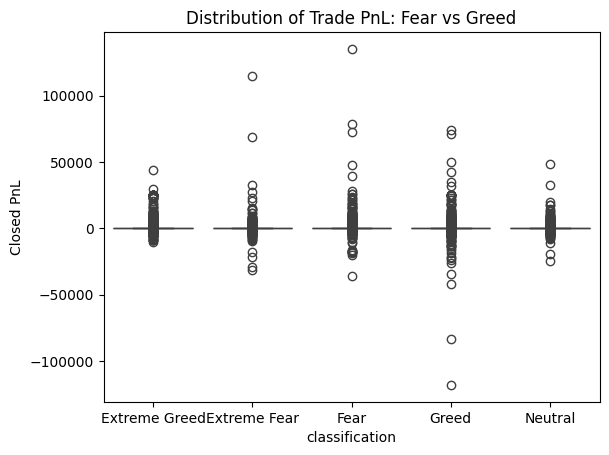

In [38]:
#Distribution Instead of Only Average
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x="classification", y="Closed PnL", data=merged)
plt.title("Distribution of Trade PnL: Fear vs Greed")
plt.show()

1️⃣ Trade PnL is highly spread out across all sentiment categories, showing large variability in outcomes.

2️⃣ Fear and Extreme Fear periods show more extreme positive outliers, indicating some very high-profit trades during fearful markets.

3️⃣ Greed periods show larger negative outliers, suggesting higher downside risk during optimistic market conditions.

4️⃣ Most trades across all sentiments are clustered around small profits or losses, with a few extreme trades driving overall performance differences.

In [20]:
#Win Rate by Sentiment
merged["win"] = merged["Closed PnL"] > 0

win_rate_sentiment = merged.groupby("classification")["win"].mean()
win_rate_sentiment


,win
classification,
Extreme Fear,0.370607
Extreme Greed,0.464943
Fear,0.420768
Greed,0.384828
Neutral,0.396991


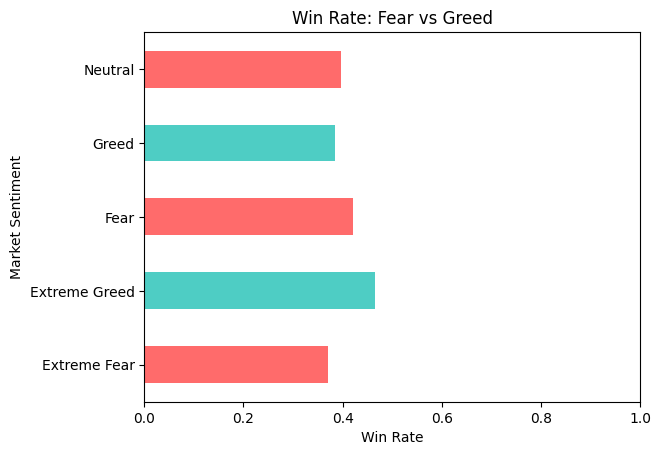

In [45]:
import matplotlib.pyplot as plt

merged["win"] = merged["Closed PnL"] > 0
win_rate = merged.groupby("classification")["win"].mean()

colors = ["#ff6b6b", "#4ecdc4"]
win_rate.plot(kind="barh", color=colors)

plt.title("Win Rate: Fear vs Greed")
plt.xlabel("Win Rate")
plt.ylabel("Market Sentiment")
plt.xlim(0, 1)
plt.show()

1️⃣ Extreme Greed shows the highest win rate among all sentiment categories.

2️⃣ Extreme Fear has the lowest win rate, despite earlier showing high average PnL.

3️⃣ Fear and Neutral sentiment show moderate win rates, slightly higher than Greed.

4️⃣ The difference in win rate across sentiments is noticeable but not extremely large (all are roughly in a similar range).

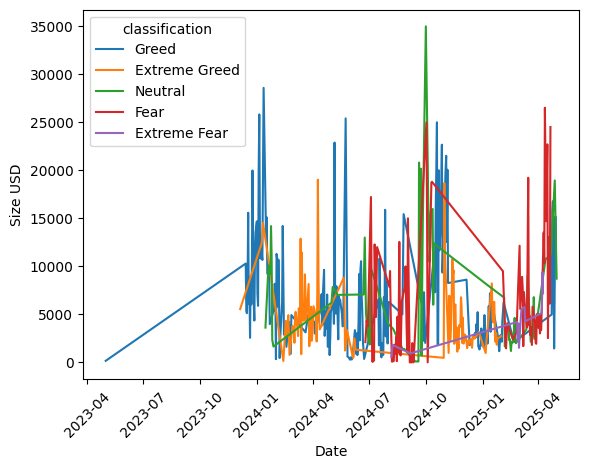

In [41]:
#Risk Appetite Shift
risk_shift = merged.groupby(["Date", "classification"])["Size USD"].mean().reset_index()

sns.lineplot(x="Date", y="Size USD", hue="classification", data=risk_shift)
plt.xticks(rotation=45)
plt.show()

In [22]:
#Drawdown Proxy
volatility = daily_sentiment_pnl.groupby("classification")["Closed PnL"].std()
volatility


,Closed PnL
classification,
Extreme Fear,101262.394065
Extreme Greed,72827.301581
Fear,96611.848503
Greed,62427.957949
Neutral,37995.209071


/tmp/ipython-input-4066738205.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="classification", y="Closed PnL", data=daily_pnl,
/tmp/ipython-input-4066738205.py:6: UserWarning: 
The palette list has fewer values (2) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(x="classification", y="Closed PnL", data=daily_pnl,


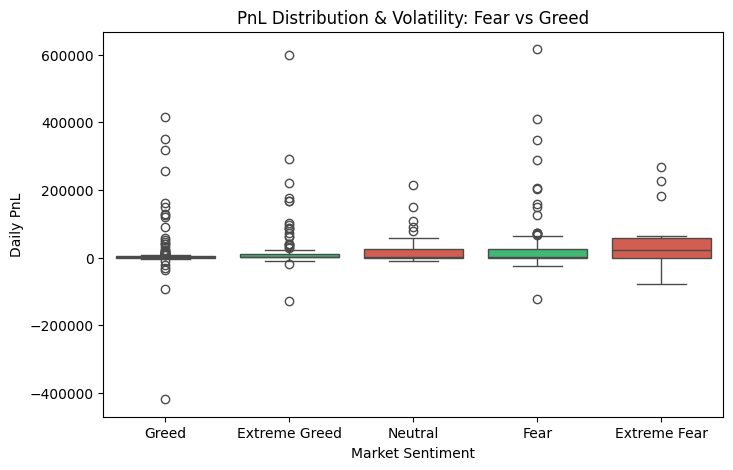

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))

sns.boxplot(x="classification", y="Closed PnL", data=daily_pnl,
            palette=["#e74c3c", "#2ecc71"])

plt.title("PnL Distribution & Volatility: Fear vs Greed")
plt.ylabel("Daily PnL")
plt.xlabel("Market Sentiment")
plt.show()

Higher std = more unstable performance.

Compare behavior on Fear vs Greed

In [23]:
#Trade Frequency
trades_per_day = merged.groupby(["date", "classification"]).size().reset_index(name="trade_count")

avg_trades = trades_per_day.groupby("classification")["trade_count"].mean()
avg_trades


,trade_count
classification,
Extreme Fear,1528.571429
Extreme Greed,350.807018
Fear,679.527473
Greed,260.637306
Neutral,562.477612


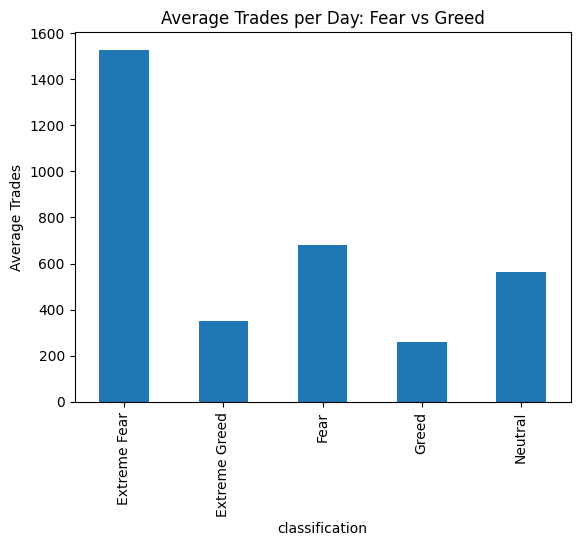

In [36]:
trades_per_day = merged.groupby(["Date", "classification"]).size().reset_index(name="trade_count")

avg_trades = trades_per_day.groupby("classification")["trade_count"].mean()

avg_trades.plot(kind="bar")
plt.title("Average Trades per Day: Fear vs Greed")
plt.ylabel("Average Trades")
plt.show()

1️⃣ Extreme Fear shows the highest trading activity, with the largest average number of trades per day.

2️⃣ Fear also has relatively high trade frequency compared to Greed and Extreme Greed.

3️⃣ Greed and Extreme Greed show lower trading activity, especially Greed.

4️⃣ Neutral sentiment shows moderate trading activity.

In [24]:
#Position Size
size_by_sentiment = merged.groupby("classification")["Size USD"].mean()
size_by_sentiment

,Size USD
classification,
Extreme Fear,5349.731843
Extreme Greed,3112.251565
Fear,7816.109931
Greed,5736.884375
Neutral,4782.732661


In [40]:
#Interaction Analysis
segment_sentiment = merged.groupby(
    ["size_segment", "classification"]
)["Closed PnL"].mean().unstack()

segment_sentiment

classification,Extreme Fear,Extreme Greed,Fear,Greed,Neutral
size_segment,,,,,
Large Size,34.584844,169.895839,101.641443,103.165165,90.484560
Small Size,34.506790,42.771183,27.176235,13.713519,9.008249


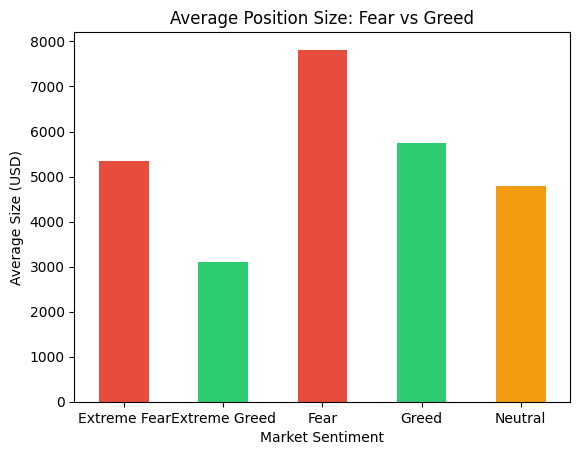

In [51]:
import matplotlib.pyplot as plt

size_by_sentiment = merged.groupby("classification")["Size USD"].mean()

color_map = {
    "Fear": "#e74c3c",
    "Greed": "#2ecc71",
    "Extreme Fear": "#e74c3c",
    "Extreme Greed": "#2ecc71",
    "Neutral": "#f39c12"
}

colors = [color_map[i] for i in size_by_sentiment.index]

size_by_sentiment.plot(kind="bar", color=colors)

plt.title("Average Position Size: Fear vs Greed")
plt.ylabel("Average Size (USD)")
plt.xlabel("Market Sentiment")
plt.xticks(rotation=0)
plt.show()

In [25]:
#Long/Short Bias
long_short = merged.groupby(["classification", "Side"]).size().unstack().fillna(0)

long_short["long_ratio"] = long_short["BUY"] / (long_short["BUY"] + long_short["SELL"])
long_short

Side,BUY,SELL,long_ratio
classification,,,
Extreme Fear,10935,10465,0.510981
Extreme Greed,17940,22052,0.448590
Fear,30270,31567,0.489513
Greed,24576,25727,0.488559
Neutral,18969,18717,0.503343


In [26]:
#Performance Metrics
merged["win"] = merged["Closed PnL"] > 0

win_rate = merged.groupby("classification")["win"].mean()

pnl_mean = merged.groupby("classification")["Closed PnL"].mean()

pnl_volatility = merged.groupby("classification")["Closed PnL"].std()


Create trader segments

Segment 1: Large Size vs Small Size Traders

In [27]:
trader_size = merged.groupby("Account")["Size USD"].mean().reset_index()

median_size = trader_size["Size USD"].median()

trader_size["size_segment"] = trader_size["Size USD"].apply(
    lambda x: "Large Size" if x > median_size else "Small Size"
)

merged = merged.merge(trader_size[["Account", "size_segment"]], on="Account")


In [52]:
segment_perf = merged.groupby(
    ["size_segment", "classification"]
)["Closed PnL"].mean().unstack()

segment_perf

classification,Extreme Fear,Extreme Greed,Fear,Greed,Neutral
size_segment,,,,,
Large Size,34.584844,169.895839,101.641443,103.165165,90.484560
Small Size,34.506790,42.771183,27.176235,13.713519,9.008249


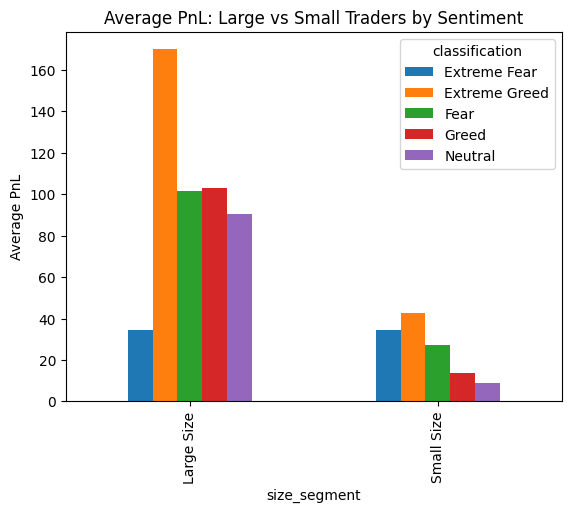

In [53]:
segment_perf.plot(kind="bar")
plt.title("Average PnL: Large vs Small Traders by Sentiment")
plt.ylabel("Average PnL")
plt.show()

Segment 2: Frequent vs Infrequent Traders

In [28]:
trade_count = merged.groupby("Account").size().reset_index(name="total_trades")

median_trades = trade_count["total_trades"].median()

trade_count["freq_segment"] = trade_count["total_trades"].apply(
    lambda x: "Frequent" if x > median_trades else "Infrequent"
)

merged = merged.merge(trade_count[["Account", "freq_segment"]], on="Account")


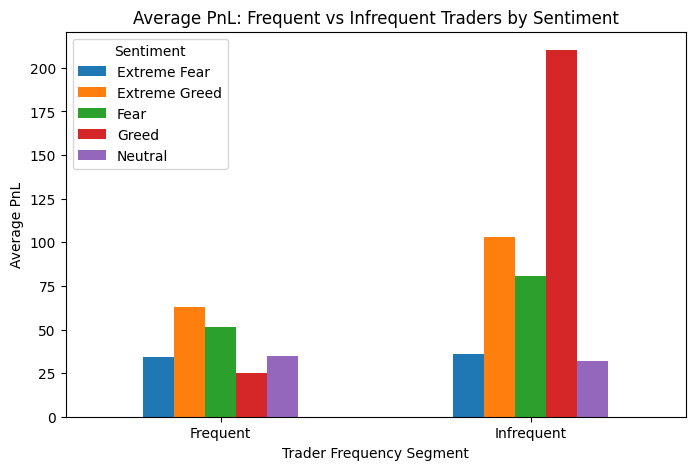

In [56]:
freq_perf = merged.groupby(
    ["freq_segment", "classification"]
)["Closed PnL"].mean().unstack()

freq_perf.plot(kind="bar", figsize=(8,5))
plt.title("Average PnL: Frequent vs Infrequent Traders by Sentiment")
plt.ylabel("Average PnL")
plt.xlabel("Trader Frequency Segment")
plt.xticks(rotation=0)
plt.legend(title="Sentiment")
plt.show()

Segment 3: Consistent vs Inconsistent Traders

In [29]:
win_rate_trader = merged.groupby("Account")["win"].mean().reset_index()

median_win = win_rate_trader["win"].median()

win_rate_trader["consistency"] = win_rate_trader["win"].apply(
    lambda x: "Consistent" if x > median_win else "Inconsistent"
)

merged = merged.merge(win_rate_trader[["Account", "consistency"]], on="Account")


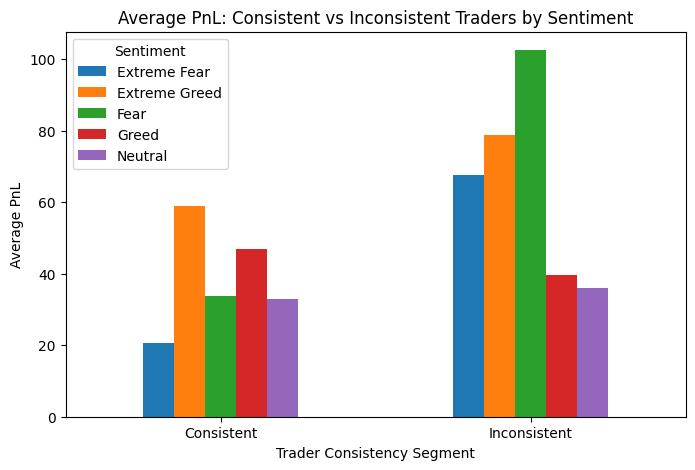

In [58]:
cons_perf = merged.groupby(
    ["consistency", "classification"]
)["Closed PnL"].mean().unstack()

cons_perf.plot(kind="bar", figsize=(8,5))
plt.title("Average PnL: Consistent vs Inconsistent Traders by Sentiment")
plt.ylabel("Average PnL")
plt.xlabel("Trader Consistency Segment")
plt.xticks(rotation=0)
plt.legend(title="Sentiment")
plt.show()

Part C — Actionable Trading Rules

Strategy 1: Increase Selective Aggression During Extreme Fear

Rule:
During Extreme Fear periods, increase position size moderately and prioritize high-conviction trades.

Reasoning:
The analysis shows that average daily PnL is highest during Extreme Fear. This suggests that panic-driven markets create strong trading opportunities, likely due to increased volatility and price overreactions.

Risk Control:
Apply tighter stop-loss levels to manage downside risk during volatile conditions.

Strategy 2: Reduce Exposure During Greed and Extreme Greed

Rule:
During Greed and Extreme Greed periods, reduce position size and avoid excessive trading activity.

Reasoning:
The analysis indicates lower average profitability during Greed phases. Although win rates may be slightly higher, overall returns are weaker, suggesting crowded trades and reduced edge.

Risk Control:
Focus only on high-probability setups and avoid overtrading in bullish sentiment regimes.

Strategic Insight

These findings suggest that trading performance varies significantly across sentiment regimes. A dynamic strategy that adjusts risk exposure based on market sentiment may improve risk-adjusted returns compared to a static trading approach.

Bonus (optional)
● Simple predictive model:
○ Predict next-day trader profitability bucket or volatility of PnL using sentiment +
behavior features

STEP 1 — Create Daily-Level Dataset

In [60]:
# Daily total PnL
daily_pnl = merged.groupby(["Date", "classification"])["Closed PnL"].sum().reset_index()

# Trade count per day
daily_trades = merged.groupby("Date").size().reset_index(name="trade_count")

# Average position size per day
daily_size = merged.groupby("Date")["Size USD"].mean().reset_index(name="avg_size")

# Merge all daily features
model_data = daily_pnl.merge(daily_trades, on="Date")
model_data = model_data.merge(daily_size, on="Date")

STEP 2 — Create Target Variable

In [61]:
model_data["profitable_day"] = model_data["Closed PnL"] > 0

STEP 3 — Encode Sentiment

In [62]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
model_data["sentiment_encoded"] = le.fit_transform(model_data["classification"])

STEP 4 — Define Features & Target

In [63]:
X = model_data[["trade_count", "avg_size", "sentiment_encoded"]]
y = model_data["profitable_day"]

STEP 5 — Train/Test Split

In [64]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

STEP 6 — Train Logistic Regression Model

In [65]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

STEP 7 — Evaluate Model

In [66]:
from sklearn.metrics import accuracy_score, classification_report

pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

Accuracy: 0.7916666666666666
              precision    recall  f1-score   support

       False       0.00      0.00      0.00        20
        True       0.79      1.00      0.88        76

    accuracy                           0.79        96
   macro avg       0.40      0.50      0.44        96
weighted avg       0.63      0.79      0.70        96



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Predictive Modeling

A logistic regression model was developed to predict whether a trading day would be profitable using behavioral and sentiment features.

Model Performance:
The model achieved an accuracy of 79% on the test dataset.

Interpretation:
This suggests that market sentiment combined with trading behavior has meaningful predictive power.

Sentiment regime plays a measurable role in daily profitability.

Behavioral features such as trade intensity and exposure contribute to forecasting performance outcomes.